This notebook is some of the testing out of concepts and practice I did following along with

### Assembly AI's "PyTorch Crash Course - Getting Started with Deep Learning"

at the link:

https://www.youtube.com/watch?v=OIenNRt2bjg

The video doesn't conver concepts, just code implementation, which is great for me when trying
to switch from tensorflow to pytorch.

Practice Notebook Concepts:
1. Tensor Basics
2. Autograd w/ torch
3. Neural Network (for MNIST)
4. CNN (for MNIST)

In [ ]:
# Imports
import torch
import numpy as np
device = torch.device("mps")

In [ ]:
# Making arrays / matricies / tensors
x1 = torch.empty(3, 3, 3)
x2 = torch.zeros(5)
x3 = torch.ones(5)
x4 = torch.rand(5, dtype=torch.float16)

# Shape / size
a = x1.size()
b = x1.shape
print(a)
print(b)

# Tensors
x = torch.tensor([5, 3], requires_grad=True) # requires_grad tells torch whether you need it to calculate gradient for later (defualt is False)
y = torch.tensor([4, 9])

print(x + y) # element wise addition
print(y.add(x))
print(y)
print(y.add_(x)) # adding in place
print(y)

In [ ]:
# Slicing
x = torch.rand(5, 3)
print(x[:, 0]) # all rows, column 0
print(x[1, :]) # first row, all columns
print(x[1, 1]) # --> returns a tensor
print(x[1, 1].item()) # --> returns a float value

In [ ]:
# Reshape
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # -1 tells torch to figure it out based on other dims

print(x.shape[0], y.shape, z.shape)

In [ ]:
# Torch to numpy
# Note: If the tensor is on the CPU (instead of GPU) 
# both objects will share memory, so changing one 
# changes the other.
t = torch.ones(4)
n = t.numpy()
t[0] = 2
print(f"{t}\n{n}")


In [ ]:
# Numpy to torch
n = np.ones(5)
t = torch.from_numpy(n) # points to same array
t2 = torch.tensor(n) # makes a copy of array 
n[0] = 2

print(f"{n}\n{t}\n{t2}")

In [ ]:
# GPU
device = torch.device("mps")
n = np.ones(5, dtype=np.float32)
t = torch.zeros(3, 3, 3,).to(device) # make on CPU, move to GPU
t2 = torch.zeros(3, 3, 3, device=device)
n[0] = 2

### 2. Autograd - The autograd package provide automatic differentiation. (Applies partial derivatives while applying the chain rule.)

In [ ]:
x = torch.tensor([3.0], requires_grad=True)
y = x ** 2 + 2

y.sum().backward() # does all the backprop
print(x.grad) # dy/dx

"""
!!! backward() accumulates the gradient for this tesnor into .grad !!!
!!! make sure to clear this each time with optimizer.zero_grad() !!!
"""

# To stop autograd:
# x.requires_grad_(False)
# x.detach() - creates a copy with requires_grad=False
# wrap in "with torch.no_grad():"

In [ ]:
""" Linear Regression with Autograd """

# Training examples (actual model should give y = 2 * x)
X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# forward method
def forward(x):
    return w * x

# loss (using mean squared error, MSE)
def loss(y, y_hat):
    return ((y - y_hat) ** 2).mean()

X_test = 5.0

print(f"Starting prediction: {X_test} --> {forward(X_test)}")

learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    y_pred = forward(X) # prediction tensor of all training examples
    l = loss(Y, y_pred)

    # Finding all gradients
    l.backward()

    # Gradient descent (for one var)
    with torch.no_grad():
        w -= learning_rate * w.grad

    # Emptying gradients
    w.grad.zero_()

    # Progress check
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: w = {w.item():.3f}, loss = {l:.3f}")

print(f"Prediction: f({X_test} = {forward(X_test).item():.3f})")


### 3. Model, Loss, & Optimizer

Typical PyTorch pipeline:

1. Design mode (input --> forward pass thru layers --> output)
2. Construct loss and optimizer
3. Training loop:
    - Forwards (computer prediction and loss)
    - Backward (compute gradeints)
    - Update weights

In [25]:
import torch
import torch.nn as nn

# Column vectors for training and target values
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32) 
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

# Shape
n_samples, n_features = X.shape
print(f"samples = {n_samples}, features = {n_features}")

# Test set
X_test = torch.tensor([[20]], dtype=torch.float32, requires_grad=True)
Y_test = torch.tensor([[40]], dtype=torch.float32)

# 1) Design the Model
class LinearRegression(nn.Module): # inherits from nn.Module --> base class for all neural networks
    def __init__(self, input_dim, output_dim):
        super().__init__() # setting up important stuff using superconstructor
        self.lin = nn.Linear(input_dim, output_dim) # one linear layer

    def forward(self, x): # place to apply each layer
        return self.lin(x)
    
input_size = output_size = n_features

model = LinearRegression(input_size, output_size)

print(f"Pre-training Prediction: f({X_test.item():.3f}) = {Y_test.item():.3f}")

# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # SGD --> stochastic gradient descent

# 3) Training loop
for epoch in range(n_epochs):
    # Forwards pass
    Y_hat = model(X)

    # Calculate loss
    l = loss(Y, Y_hat)

    # Backprop
    l.backward()

    # Update weights
    optimizer.step()

    # Clearing gradients
    optimizer.zero_grad()

    # Progress check
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: w = {w.item():.3f}, loss = {l:.3f}")

print(f"Prediction: f({X_test} = {model(X_test).item():.3f})")

samples = 8, features = 1
Pre-training Prediction: f(20.000) = 40.000
Epoch 10: w = 2.000, loss = 0.046
Epoch 20: w = 2.000, loss = 0.042
Epoch 30: w = 2.000, loss = 0.039
Epoch 40: w = 2.000, loss = 0.036
Epoch 50: w = 2.000, loss = 0.033
Epoch 60: w = 2.000, loss = 0.031
Epoch 70: w = 2.000, loss = 0.028
Epoch 80: w = 2.000, loss = 0.026
Epoch 90: w = 2.000, loss = 0.024
Epoch 100: w = 2.000, loss = 0.022
Prediction: f(tensor([[20.]], requires_grad=True) = 40.838)


#### 4. Creating a NN

Same process as step 3, but multiple layers.

Concepts:
GPU use, Datasets, Dataloader, Transforms, Neural Net, Training & Evaluation

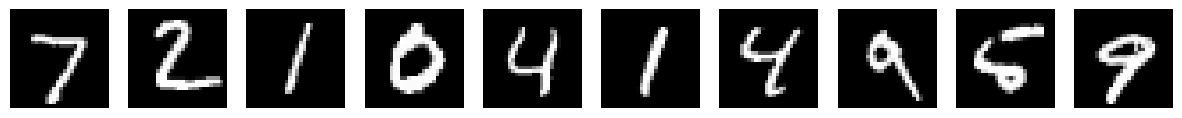

In [65]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Hyper-parameters
input_size = 784 # 28x28 MNIST images
hidden_size = 500 # number of neurons in the hidden layer
num_classes = 10 # number of outputs (or classes), 10, since we have 10 digits
num_epochs = 20
batch_size = 100
learning_rate = 0.001

# Fetching dataset
train_dataset = torchvision.datasets.MNIST(
    root="./data",                     # from data folder
    train=True,                        # extract training data and
    transform=transforms.ToTensor(),   # convert to a tensor.
    download=False                      # download data on this device (if it's not already there)
)
test_dataset = torchvision.datasets.MNIST(
    root="./data",                   # from data folder
    train=False,                     # extract non-training (test data) (10k examples)
    transform=transforms.ToTensor(),  # convert to a tensor
    download=False
)

# Data loaders --> helps batch, shuffle, and feed data into the model
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=False
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

examples = iter(test_loader)
example_data, example_targets = next(examples)

r = 1
c = 10

plt.figure(figsize=(15, 4))

for i in range(r * c):
    plt.subplot(r, c, i + 1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
# Creating the neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__() # Calling superconstructor
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output = self.l1(x) # Pass thru Layer1
        output = self.relu(output) # Applying ReLU activation function
        output = self.l2(output) # Pass thru Layer2
        return output # no activation function & no softmax at the end
    
model = NeuralNetwork(input_size, hidden_size, num_classes).to(device) # move to GPU

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): # iterating over the training set
        # Reshaping input & moving to GPU
        images = images.reshape(-1, 28*28).to(device) # (batch_size, features) --> each row is a training example
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Loss
        loss = criterion(outputs, labels)

        # Backprop & optimizers
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Progress
        if (i+1) % 100 == 0:
            print(f"Epoch {epoch + 1}: Step [{i+1}/{n_total_steps}], Loss: {loss.item():.3f}")

Epoch 1: Step [100/600], Loss: 0.193
Epoch 1: Step [200/600], Loss: 0.306
Epoch 1: Step [300/600], Loss: 0.384
Epoch 1: Step [400/600], Loss: 0.310
Epoch 1: Step [500/600], Loss: 0.242
Epoch 1: Step [600/600], Loss: 0.224
Epoch 2: Step [100/600], Loss: 0.108
Epoch 2: Step [200/600], Loss: 0.125
Epoch 2: Step [300/600], Loss: 0.178
Epoch 2: Step [400/600], Loss: 0.149
Epoch 2: Step [500/600], Loss: 0.133
Epoch 2: Step [600/600], Loss: 0.186
Epoch 3: Step [100/600], Loss: 0.067
Epoch 3: Step [200/600], Loss: 0.081
Epoch 3: Step [300/600], Loss: 0.099
Epoch 3: Step [400/600], Loss: 0.086
Epoch 3: Step [500/600], Loss: 0.083
Epoch 3: Step [600/600], Loss: 0.153
Epoch 4: Step [100/600], Loss: 0.046
Epoch 4: Step [200/600], Loss: 0.052
Epoch 4: Step [300/600], Loss: 0.059
Epoch 4: Step [400/600], Loss: 0.046
Epoch 4: Step [500/600], Loss: 0.053
Epoch 4: Step [600/600], Loss: 0.122
Epoch 5: Step [100/600], Loss: 0.031
Epoch 5: Step [200/600], Loss: 0.032
Epoch 5: Step [300/600], Loss: 0.037
E

In [76]:
# Testing Model
with torch.no_grad(): # no longer doing backprop, so don't need to computer gradients
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader: 
        images = images.reshape(-1, 28*28).to(device) # X
        labels = labels.to(device) # Y

        outputs = model(images)

        # torch.max returns (max_values, indices_of_max_values)
        _, predicted = torch.max(outputs, 1) # max value in outputs going across columns (1st dim)
        n_correct += (predicted == labels).sum().item()

    accuracy = n_correct / n_samples
    print(f"Accuracy of {(accuracy*100):.2f}% on the {n_samples} test image.")


Accuracy of 97.54% on the 10000 test image.


### 5. CNN

Concepts:
* Convolutional layers
* MaxPooling
* Save/Load model


Currently, I do not have the theoretical knowledge to implement a CNN and understand how it working.
Because of that, I'm going to pivot to MIT's 6.S191 course to better learn theory, and implement what
I learn in pytorch (rather than tensorflow, which is what the course uses). I'll be making a repo for 
that as well.

